In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [46]:
df = pd.read_csv('LoanApprovalPrediction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [47]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Preprocessing and Visualization


In [48]:
categorical_col = df.select_dtypes(include = 'object').columns.tolist()
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [49]:
#loan_ID is not correlated to any of the columns so we will drop it
df.drop(['Loan_ID'],axis = 1,inplace= True)

In [50]:
df.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
df['Dependents']= df['Dependents'].fillna(df['Dependents'].mean())
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [52]:

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [56]:
categorical_col = [col for col in categorical_col if col != 'Loan_ID']
print(categorical_col)

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


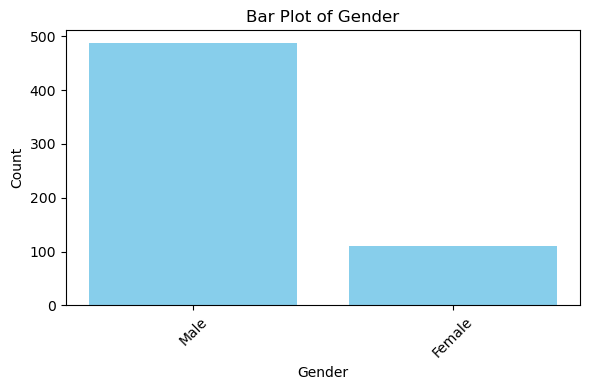

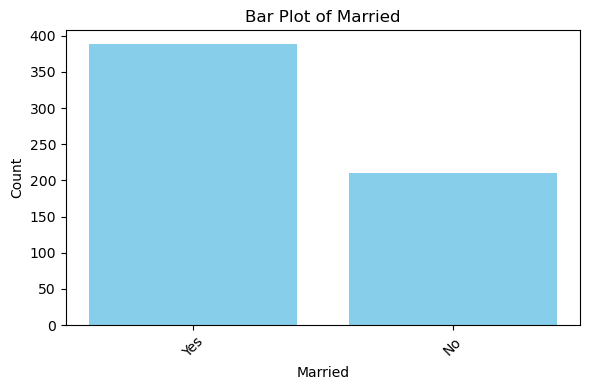

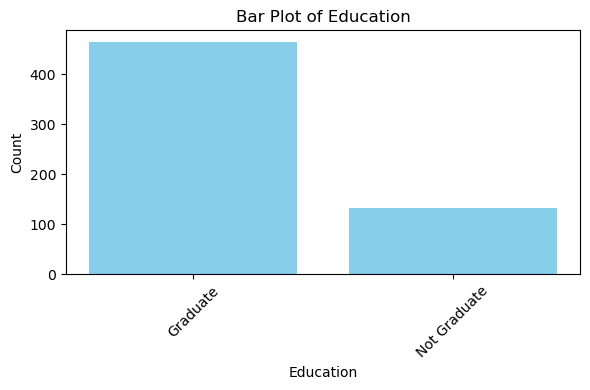

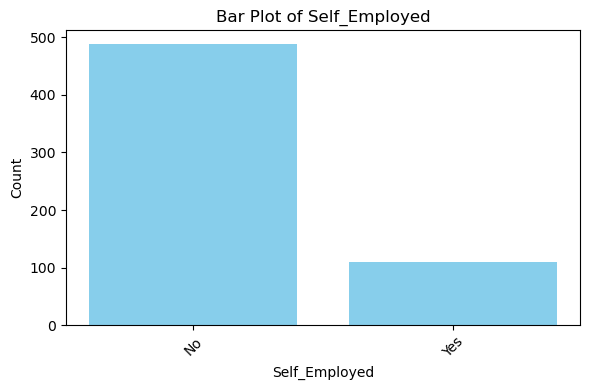

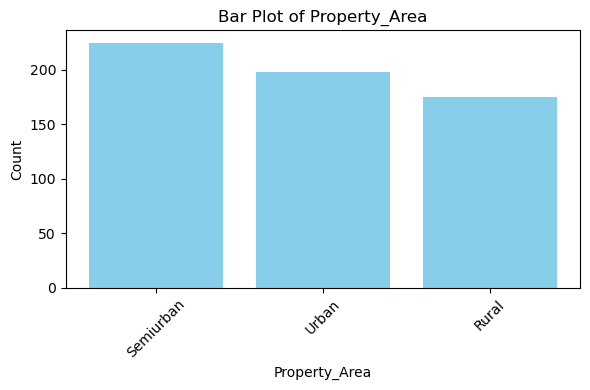

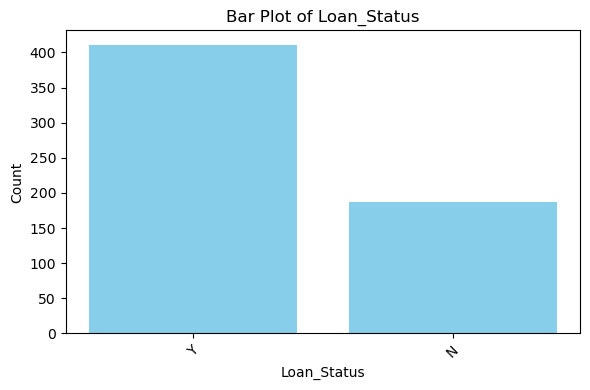

In [60]:
#bar plot is possible for categoricalcol
for col in categorical_col:
    y = df[col].value_counts()
    plt.figure(figsize=(6, 4))
    plt.bar(y.index, y.values, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [62]:
#all categorical column are binary so we need to use label Encoder for all such columns and values will be changes to int type
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
    df[col]= label_encoder.fit_transform(df[col])

In [65]:
categroical_Col = df.select_dtypes(include ='object').columns.tolist()
print(categroical_Col)

[]


In [66]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


<Axes: >

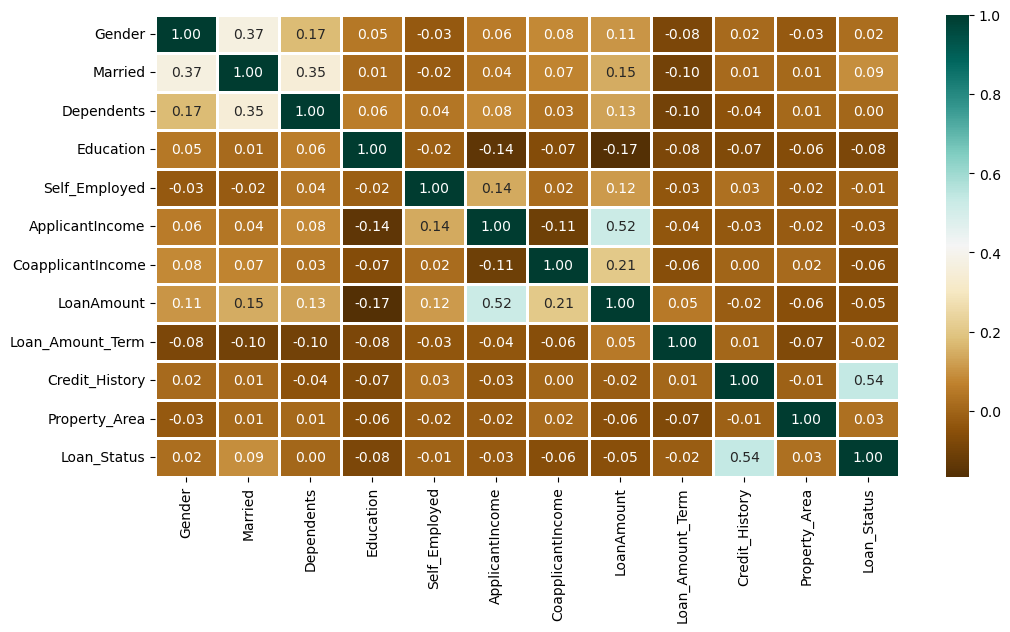

In [67]:
#find correlation pattern
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',annot = True,linewidths = 2)

The above heatmap is showing the correlation exist between loanamount and applicantIncome . It also shows that credithistory has high impact on loanstatus.


# splitting the dataset


In [68]:
from sklearn.model_selection import train_test_split
X = df.drop(['Loan_Status'],axis = 1)
Y = df['Loan_Status']
X.shape,Y.shape
X_train,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state =1 )
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

# Model training and evaluation 

As this is a classification problem so we will be using these models :

- KNeighborsClassifiers: works by identifying the 'k' nearest data points called as neighbors to a given input and predicting its class or value based on the majority class or the average of its neighbors. 


- RandomForestClassifiers : is a method that combines the predictions of multiple decision trees to produce a more accurate and stable result. It can be used for both classification and regression tasks.
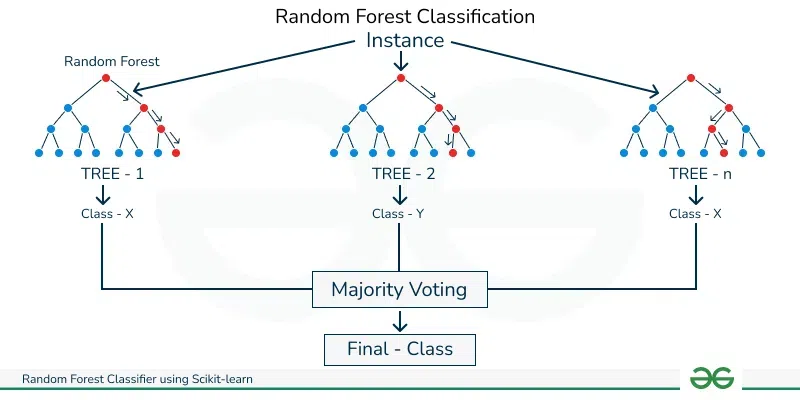


- Support Vector Classifiers (SVC) : Support Vector Machines (SVMs) are supervised learning algorithms widely used for classification and regression tasks. They can handle both linear and non-linear datasets by identifying the optimal decision boundary (hyperplane) that separates classes with the maximum margin. This improves generalization and reduces misclassification.


- Logistics Regression : Logistic Regression is a supervised machine learning algorithm used for classification problems. Unlike linear regression which predicts continuous values it predicts the probability that an input belongs to a specific class. It is used for binary classification where the output can be one of two possible categories such as Yes/No, True/False or 0/1. It uses sigmoid function to convert inputs into a probability value between 0 and 1.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [77]:
knn = KNeighborsClassifier(n_neighbors = 3)
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy',
                             random_state = 7)
svc = SVC()
lc = LogisticRegression(max_iter=1000)


In [78]:
for clf in (knn,rfc,svc,lc):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",clf.__class__.__name__,
         "=",100*metrics.accuracy_score(Y_train,Y_pred))

Accuracy score of  KNeighborsClassifier = 78.49162011173185
Accuracy score of  RandomForestClassifier = 98.04469273743017
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 80.16759776536313


C:\Users\Insha sadaf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
#prediction on test data
for clf in (knn,rfc,svc,lc):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    print("accuracy score of ",
         clf.__class__.__name__,"=",
         100*metrics.accuracy_score(Y_test,Y_pred))

accuracy score of  KNeighborsClassifier = 63.74999999999999
accuracy score of  RandomForestClassifier = 82.5
accuracy score of  SVC = 69.16666666666667
accuracy score of  LogisticRegression = 81.66666666666667


C:\Users\Insha sadaf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Classifier is giving the best accuracy with an accuracy score of 82% for the testing dataset. 